In [1]:
import sys
sys.path.insert(0,'../tools/DCGAN-tensorflow')

import os
import scipy.misc
import numpy as np
from matplotlib import pyplot as plt

import tensorflow as tf
import tensorflow.contrib.slim as slim

from model import DCGAN
from utils import pp, visualize, to_json, show_all_variables, save_images

In [2]:
input_width, input_height = 128, 128
output_width, output_height = 128, 128
batch_size = 64
z_dim = 100
crop = False
#dataset_name = 'landscape_128'
dataset_name = 'logos'
checkpoint_dir = '../tools/DCGAN-tensorflow/checkpoint'
data_dir = '../datasets/'
sample_dir = '../tools/DCGAN-tensorflow/samples'

run_config = tf.ConfigProto()
run_config.gpu_options.allow_growth=True

with tf.Session(config=run_config) as sess:
  dcgan = DCGAN(sess,
      input_width=input_width,
      input_height=input_height,
      output_width=output_width,
      output_height=output_height,
      batch_size=batch_size,
      sample_num=batch_size,
      z_dim=z_dim,
      dataset_name=dataset_name,
      input_fname_pattern='*.jpg',
      crop=crop,
      checkpoint_dir=checkpoint_dir,
      data_dir=data_dir,
      sample_dir=sample_dir)

dcgan.load(checkpoint_dir=checkpoint_dir)

 [*] Reading checkpoints...
INFO:tensorflow:Restoring parameters from ../tools/DCGAN-tensorflow/checkpoint/logos_64_128_128/DCGAN.model-13502
 [*] Success to read DCGAN.model-13502


(True, 13502)

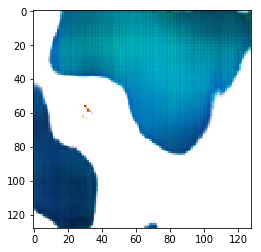

768


In [9]:

    
def sample_progression(dcgan, n):
    z1 = np.random.uniform(-1, 1, size=(dcgan.z_dim))
    samples = []
    for i in range(n):
        z2 = np.random.uniform(-1, 1, size=(dcgan.z_dim))
        zs = np.array([ (1.0-t)*z1 + t*z2  for t in np.linspace(0, 1, dcgan.batch_size)])
        samples.append(sess.run(dcgan.sampler, feed_dict={dcgan.z: zs}))
        z1 = z2
    samples = [s for segment in samples for s in segment]
    return samples    

def inverse_transform(x):
    return (x + 1.0) / 2.0
    
def display(sample):
    s = inverse_transform(sample)
    s = np.array(255.0*s).astype(np.uint8)
    plt.imshow(s, interpolation='nearest')
    plt.show()

      
z1 = np.random.uniform(-1, 1, size=(dcgan.z_dim))
z2 = np.random.uniform(-1, 1, size=(dcgan.z_dim))
z_sample = np.array([ (1.0-t)*z1 + t*z2  for t in np.linspace(0, 1, batch_size)])



#z_sample = np.random.uniform(-1.0, 1.0, size=(64, dcgan.z_dim))
samples = sess.run(dcgan.sampler, feed_dict={dcgan.z: z_sample})



samples = sample_progression(dcgan, 12)



#print(samples[0])



#s = np.array(255*samples[0]).astype('uint8')



display(samples[0])
# for i in range(1,64):
#     display(samples[i])
    
#showarray(np.array(samples[0]))
#print(samples[0].dtype)
print(len(samples))


In [35]:
#save_images(samples, [image_frame_dim, image_frame_dim], './samples/test_%s.png' % strftime("%Y-%m-%d-%H-%M-%S", gmtime()))

In [10]:
import moviepy.editor as mpy

def make_frame(t):
    nf, fps = 768, 30
    x = samples[int(min(nf-1, fps*t))]
    return ((x+1.)/2.*255).astype(np.uint8)


clip = mpy.VideoClip(make_frame, duration=25.6)
clip.write_videofile('test_logos.mp4', fps=30)

[MoviePy] >>>> Building video test_logos.mp4
[MoviePy] Writing video test_logos.mp4


100%|█████████▉| 768/769 [00:00<00:00, 1238.21it/s]

[MoviePy] Done.
[MoviePy] >>>> Video ready: test_logos.mp4 

